In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.sparse import csr_matrix, diags, eye
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot as plt
import pylab

plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (16.0, 10.0)

%matplotlib inline

In [2]:
df = pd.read_csv("./facebook_combined.txt.gz", compression='infer', sep=" ", header=None, names=["a", "b"])
print(len(df))
df.head()

88234


,a,b
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [3]:
e = len(df)
v = len(np.unique(df.a))
v = max(np.max(np.unique(df.a)), np.max(np.unique(df.b))) + 1
print(e,v)

88234 4039


In [4]:
facebook2 = csr_matrix((np.ones(e), (df.a, df.b)), shape=(v,v))
facebook2 = 1 * ((facebook2 + facebook2.T) !=0)

In [5]:
import networkx as nx
import metis

In [6]:
%time g = nx.from_scipy_sparse_matrix(facebook2)

CPU times: user 2.04 s, sys: 12 ms, total: 2.05 s
Wall time: 2.05 s


# Ancienne méthode

n_clusters = int(facebook2.shape[0]/100)
print(n_clusters)

%time (edgecuts, parts) = metis.part_graph(g, n_clusters, objtype='cut', ufactor=1000, contig=True, niter=100)
print(edgecuts, len(parts), len(np.unique(parts)))
parts = np.array(parts)

# Nouvelle méthode

In [7]:
n_clusters = int(facebook2.shape[0]/40)
print(n_clusters)

%time adj = metis.adjlist_to_metis(list(df.to_records(index=None)))

%time (edgecuts, parts) = metis.part_graph(g, n_clusters, objtype='cut', ufactor=1000, contig=True, niter=100)
print(edgecuts, len(parts), len(np.unique(parts)))
parts = np.array(parts)

100
CPU times: user 1.12 s, sys: 0 ns, total: 1.12 s
Wall time: 1.12 s
CPU times: user 760 ms, sys: 16 ms, total: 776 ms
Wall time: 784 ms
47915 4039 100


In [8]:
nodes = pd.DataFrame({"part": parts})
nodes.groupby("part").size().describe()

count    100.000000
mean      40.390000
std       24.650648
min        6.000000
25%       20.000000
50%       27.500000
75%       65.250000
max       80.000000
dtype: float64

Cluster #6 is of size 28
pseudo-degree of cluster is 182


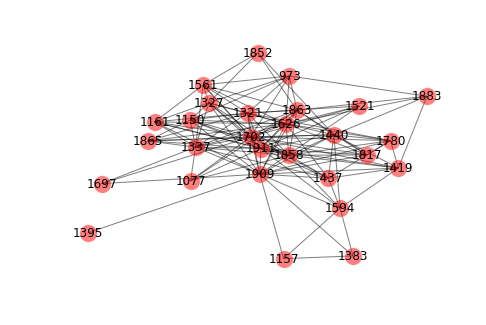

In [9]:
from IPython.html.widgets import interact
import graph_helpers
from imp import reload
reload(graph_helpers)

@interact
def plot(cl = ('6', '7', '8', '10', '20', '30'), degree=("0", "1", "2"), layout=("spring", "std", "spectral")):
    cl = int(cl)
    print("Cluster #%d is of size %d" % (cl, (parts == cl).sum()))
    
    print("pseudo-degree of cluster is %d" % graph_helpers.get_deg_sub(facebook2, parts == cl))
    
    graph_helpers.plot_subgraph_links(facebook2, parts == cl, int(degree), layout=layout, graph=g)

count    100.000000
mean     185.090000
std      163.944256
min        1.000000
25%       69.750000
50%      147.500000
75%      270.250000
max      966.000000
dtype: float64


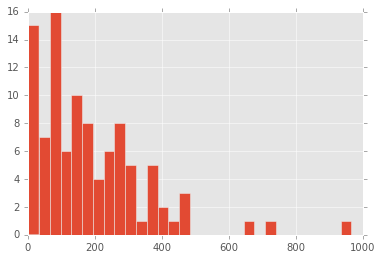

In [10]:
all_degs = [graph_helpers.get_deg_sub(facebook2, parts == i) for i in range(n_clusters)]
print(pd.Series(all_degs).describe())
_ = plt.hist(all_degs, bins=30)

In [11]:
cl6 = np.where(parts == 6)[0]
df[(df.a.isin(cl6)) & ~ (df.b.isin(cl6))]

,a,b
14652,973,990
14654,973,1178
14655,973,1272
14658,973,1369
14659,973,1461
14660,973,1505
14662,973,1597
14664,973,1656
18627,1077,1165
18628,1077,1171


In [12]:
df[(df.b.isin(cl6)) & ~ (df.a.isin(cl6))]

,a,b
1746,107,973
1850,107,1077
1923,107,1150
1930,107,1157
1934,107,1161
2094,107,1321
2100,107,1327
2110,107,1337
2156,107,1383
2168,107,1395


In [14]:
clusters = parts

### Evaluation de performance

In [18]:
from gmet import group_vertex_degree, group_edge_degree

cldegs_pd = pd.DataFrame({'sz': [(clusters == cl).sum() for cl in range(n_clusters)],
                          'edeg': [group_vertex_degree(facebook2, clusters == i) for i in range(n_clusters)],
                          'vdeg': [group_edge_degree(facebook2, clusters == i) for i in range(n_clusters)]})

cldegs_pd["vratio"] = cldegs_pd.vdeg / cldegs_pd.sz
cldegs_pd["eratio"] = cldegs_pd.edeg / cldegs_pd.sz

cldegs_pd.describe()

,edeg,sz,vdeg,vratio,eratio
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,185.090000,40.390000,958.300000,19.907984,5.572535
std,163.944256,24.650648,1653.235111,22.361154,5.194816
min,1.000000,6.000000,4.000000,0.066667,0.066667
25%,69.750000,20.000000,147.250000,5.193409,1.882541
50%,147.500000,27.500000,382.000000,12.787500,3.493750
75%,270.250000,65.250000,878.500000,24.387500,8.037500
max,966.000000,80.000000,8278.000000,103.475000,23.350000


In [21]:
cldegs_pd[cldegs_pd.eratio < 0.5].describe()

,edeg,sz,vdeg,vratio,eratio
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,6.250000,32.375000,33.375000,1.131478,0.219557
std,5.284749,19.227491,25.297868,0.524900,0.157561
min,1.000000,6.000000,4.000000,0.066667,0.066667
25%,3.750000,21.500000,20.250000,1.060000,0.110833
50%,4.500000,26.500000,27.500000,1.118182,0.174242
75%,6.750000,43.500000,44.250000,1.341071,0.273214
max,18.000000,60.000000,74.000000,1.947368,0.473684


0.04530000000000001


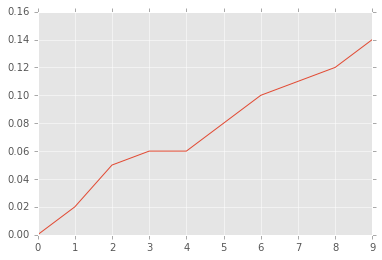

In [17]:
def eratios(df):
    return [len(df[df.eratio < i/10.])/len(df) for i in range(10)]

def perf(df):
    er = eratios(df)
    return sum([i * er[i] / 10. for i in range(10)]) / 10.

er = eratios(cldegs_pd)

print (perf(cldegs_pd))

plt.plot(er)